<a href="https://colab.research.google.com/github/Junichi-o/SPT_BH_Radiation/blob/main/Snippets_Importing_libraries_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.4_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.4) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=f20e449dc6a31d7304e486909acff839d916e65ad0dde1b762d580f075650bab
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 58.0 MB/s eta 0:00:00


In [ ]:
!pip install --force-reinstall cobaya classy numpy matplotlib

  Using cached cobaya-3.5.7-py3-none-any.whl
  Using cached classy-3.3.0.0-cp311-cp311-linux_x86_64.whl
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached matplotlib-3.10.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached PyYAML-6.0.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached Py_BOBYQA-1.5.0-py3-none-any.whl.metadata (9.5 kB)
  Using cached getdist-1.6.4-py3-none-any.whl.metadata (13 kB)
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached tqdm-4.67.1-py3-none-any

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 初期パラメータ
M0 = 1.0  # 初期質量（太陽質量）
epsilon, delta = 0.01, 0.01  # テンソル振幅
n = 1.5  # 減衰指数
spt_alpha, s_osc = 0.1, 1e24  # SPT振動パラメータ
r = np.linspace(2, 10*M0, 100)  # 半径グリッド（地平面 r=2M から外側）
theta = np.linspace(0, np.pi, 50)  # 角度グリッド
r_grid, theta_grid = np.meshgrid(r, theta)
T_H = 1 / (8 * np.pi * M0)  # ホーキング温度
omega = 0.111 / M0 * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))  # SPT振動項
f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n)  # 放射項
rho = (epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)))**2  # エネルギー密度
x = r_grid * np.sin(theta_grid)  # x座標
y = r_grid * np.cos(theta_grid)  # y座標
z = rho  # z座標（エネルギー密度）
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])
fig.update_layout(title='シュワルツシルトエネルギー密度', scene=dict(xaxis_title='x/M0', yaxis_title='y/M0', zaxis_title='エネルギー密度'))
fig.show()  # Colab内で3Dプロットをインタラクティブ表示

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 初期パラメータ
M0, alpha_spin0 = 1.0, 0.6  # 初期質量、回転パラメータ
epsilon, delta = 0.01, 0.01  # テンソル振幅
beta, gamma, n = 1.6, 0.06, 1.5  # 角度依存、フレームドラッギング、減衰指数
spt_alpha, s_osc = 0.1, 1e24  # SPT振動パラメータ
r = np.linspace(1.8, 10*M0, 100)  # 半径グリッド
theta = np.linspace(0, np.pi, 50)  # 角度グリッド
r_grid, theta_grid = np.meshgrid(r, theta)
r_plus = M0 + np.sqrt(M0**2 - (alpha_spin0 * M0)**2)  # 事象の地平面
T_H = np.sqrt(M0**2 - (alpha_spin0 * M0)**2) / (4 * np.pi * M0 * (M0 + np.sqrt(M0**2 - (alpha_spin0 * M0)**2)))  # ホーキング温度
omega = 0.111 / M0 * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))  # SPT振動項
f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n) * (1 + beta * np.cos(theta_grid)**2)  # 放射項
div_P_r = epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)) * (1 + beta * np.cos(theta_grid)**2) - 2 * delta * np.cos(omega * r_grid) * (1 + beta * np.cos(theta_grid)**2) / r_grid**(n + 2) + gamma * (alpha_spin0 * M0 * np.sin(theta_grid)**2 / r_grid**(n + 1)) * np.cos(omega * r_grid)
rho = div_P_r**2  # エネルギー密度
x = r_grid * np.sin(theta_grid)  # x座標
y = r_grid * np.cos(theta_grid)  # y座標
z = rho  # z座標（エネルギー密度）
fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])  # 2Dから3Dサーフェスに変更
fig.update_layout(title='カーエネルギー密度', scene=dict(xaxis_title='x/M0', yaxis_title='y/M0', zaxis_title='エネルギー密度'))
fig.show()  # Colab内で3Dプロットをインタラクティブ表示

In [ ]:
import numpy as np
import plotly.graph_objects as go

# 初期パラメータ
M0, alpha_spin0 = 1.0, 0.6  # 初期質量、回転パラメータ
kappa, eta = 1e-4, 2  # 蒸発係数、回転減衰係数
epsilon, delta = 0.01, 0.01  # テンソル振幅
beta, gamma, n = 1.6, 0.06, 1.5  # 角度依存、フレームドラッギング、減衰指数
spt_beta, spt_alpha = 0.55, 0.1  # SPTパラメータ
s_base, s_osc = 1e-35, 1e24  # スケール基準、振動スケール
r = np.linspace(1.8, 10*M0, 100)  # 半径グリッド
theta = np.linspace(0, np.pi, 50)  # 角度グリッド
r_grid, theta_grid = np.meshgrid(r, theta)
times = [0, 5000, 10000]  # 時間点

fig = go.Figure()
for t in times:
    M = M0 / (1 + 3 * kappa * t / M0**2)**(1/3)  # 質量の時間進化
    alpha_spin = alpha_spin0 * (M / M0)**eta  # 回転の時間進化
    r_plus = M + np.sqrt(M**2 - (alpha_spin * M)**2)  # 事象の地平面
    T_H = np.sqrt(M**2 - (alpha_spin * M)**2) / (4 * np.pi * M * (M + np.sqrt(M**2 - (alpha_spin * M)**2)))  # ホーキング温度
    omega = 0.111 / M * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))  # SPT振動項
    f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n) * (1 + beta * np.cos(theta_grid)**2)  # 放射項
    div_P_r = epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)) * (1 + beta * np.cos(theta_grid)**2) - 2 * delta * np.cos(omega * r_grid) * (1 + beta * np.cos(theta_grid)**2) / r_grid**(n + 2) + gamma * (alpha_spin * M * np.sin(theta_grid)**2 / r_grid**(n + 1)) * np.cos(omega * r_grid)
    rho = div_P_r**2  # エネルギー密度
    x = r_grid * np.sin(theta_grid)  # x座標
    y = r_grid * np.cos(theta_grid)  # y座標
    z = rho  # z座標（エネルギー密度）
    fig.add_trace(go.Surface(x=x, y=y, z=z, name=f't={t}'))  # 時間ごとの3Dサーフェスを追加
fig.update_layout(title='蒸発カーブラックホールエネルギー密度', scene=dict(xaxis_title='x/M0', yaxis_title='y/M0', zaxis_title='エネルギー密度'))
fig.show()  # Colab内で3Dプロットをインタラクティブ表示

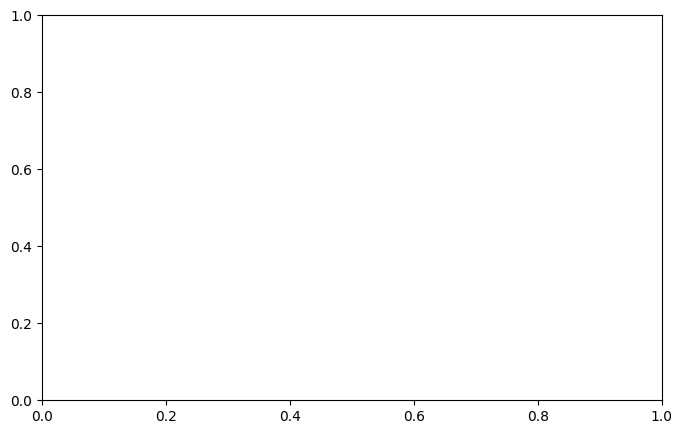

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 初期パラメータ
M0, alpha_spin0 = 1.0, 0.6
kappa, eta = 1e-4, 2
epsilon, delta = 0.01, 0.01
beta, gamma, n = 1.6, 0.06, 1.5
spt_beta, spt_alpha = 0.55, 0.1
s_base, s_osc = 1e-35, 1e24
r = np.linspace(1.8, 10*M0, 100)
theta = np.linspace(0, np.pi, 50)
r_grid, theta_grid = np.meshgrid(r, theta)

fig, ax = plt.subplots(figsize=(8, 5))
def update(t):
    ax.clear()
    M = M0 / (1 + 3 * kappa * t / M0**2)**(1/3)
    alpha_spin = alpha_spin0 * (M / M0)**eta
    r_plus = M + np.sqrt(M**2 - (alpha_spin * M)**2)
    T_H = np.sqrt(M**2 - (alpha_spin * M)**2) / (4 * np.pi * M * (M + np.sqrt(M**2 - (alpha_spin * M)**2)))
    omega = 0.111 / M * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))
    f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n) * (1 + beta * np.cos(theta_grid)**2)
    div_P_r = epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)) * (1 + beta * np.cos(theta_grid)**2) - 2 * delta * np.cos(omega * r_grid) * (1 + beta * np.cos(theta_grid)**2) / r_grid**(n + 2) + gamma * (alpha_spin * M * np.sin(theta_grid)**2 / r_grid**(n + 1)) * np.cos(omega * r_grid)
    rho = div_P_r**2
    rho_hawking = (T_H)**4 / (r_grid / r_plus)**6
    ax.contourf(r / M0, theta, rho, levels=50, cmap='viridis')
    ax.contour(r / M0, theta, rho_hawking, levels=10, colors='red', linestyles='--')
    ax.set_xlabel('r / M0')
    ax.set_ylabel('θ (rad)')
    ax.set_title(f't = {int(t)}')
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10000, 50), interval=200)
plt.show()  # Colab内でアニメーションをインタラクティブ表示
# ani.save('bh_evolution.gif', writer='pillow')  # GIF保存はコメントアウト、必要なら解除

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 初期パラメータ
M0, alpha_spin0 = 1.0, 0.6
kappa, eta = 1e-4, 2
epsilon, delta = 0.01, 0.01
beta, gamma, n = 1.6, 0.06, 1.5
spt_beta, spt_alpha = 0.55, 0.1
s_base, s_osc = 1e-35, 1e24
r = np.linspace(1.8, 10*M0, 100)
theta = np.linspace(0, np.pi, 50)
r_grid, theta_grid = np.meshgrid(r, theta)

fig, ax = plt.subplots(figsize=(8, 5))
def update(t):
    ax.clear()
    M = M0 / (1 + 3 * kappa * t / M0**2)**(1/3)
    alpha_spin = alpha_spin0 * (M / M0)**eta
    r_plus = M + np.sqrt(M**2 - (alpha_spin * M)**2)
    T_H = np.sqrt(M**2 - (alpha_spin * M)**2) / (4 * np.pi * M * (M + np.sqrt(M**2 - (alpha_spin * M)**2)))
    omega = 0.111 / M * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))
    f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n) * (1 + beta * np.cos(theta_grid)**2)
    div_P_r = epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)) * (1 + beta * np.cos(theta_grid)**2) - 2 * delta * np.cos(omega * r_grid) * (1 + beta * np.cos(theta_grid)**2) / r_grid**(n + 2) + gamma * (alpha_spin * M * np.sin(theta_grid)**2 / r_grid**(n + 1)) * np.cos(omega * r_grid)
    rho = div_P_r**2
    rho_hawking = (T_H)**4 / (r_grid / r_plus)**6
    ax.contourf(r / M0, theta, rho, levels=50, cmap='viridis')
    ax.contour(r / M0, theta, rho_hawking, levels=10, colors='red', linestyles='--')
    ax.set_xlabel('r / M0')
    ax.set_ylabel('θ (rad)')
    ax.set_title(f't = {int(t)}')
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10000, 50), interval=200)
ani.save('bh_evolution.gif', writer='pillow')  # GIFとして保存
plt.close()  # 不要な表示を閉じる

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 初期パラメータ
M0, alpha_spin0 = 1.0, 0.6
kappa, eta = 1e-4, 2
epsilon, delta = 0.01, 0.01
beta, gamma, n = 1.6, 0.06, 1.5
spt_beta, spt_alpha = 0.55, 0.1
s_base, s_osc = 1e-35, 1e24
r = np.linspace(1.8, 10*M0, 100)
theta = np.linspace(0, np.pi, 50)
r_grid, theta_grid = np.meshgrid(r, theta)

fig, ax = plt.subplots(figsize=(8, 5))
def update(t):
    ax.clear()
    M = M0 / (1 + 3 * kappa * t / M0**2)**(1/3)
    alpha_spin = alpha_spin0 * (M / M0)**eta
    r_plus = M + np.sqrt(M**2 - (alpha_spin * M)**2)
    T_H = np.sqrt(M**2 - (alpha_spin * M)**2) / (4 * np.pi * M * (M + np.sqrt(M**2 - (alpha_spin * M)**2)))
    omega = 0.111 / M * (1 + spt_alpha * np.cos(2 * np.pi * r_grid / s_osc))
    f_r = epsilon * (np.sin(omega * r_grid) / r_grid**n) * (1 + beta * np.cos(theta_grid)**2)
    div_P_r = epsilon * ((2 - n) * r_grid**(1 - n) * np.sin(omega * r_grid) + omega * r_grid**(2 - n) * np.cos(omega * r_grid)) * (1 + beta * np.cos(theta_grid)**2) - 2 * delta * np.cos(omega * r_grid) * (1 + beta * np.cos(theta_grid)**2) / r_grid**(n + 2) + gamma * (alpha_spin * M * np.sin(theta_grid)**2 / r_grid**(n + 1)) * np.cos(omega * r_grid)
    rho = div_P_r**2
    rho_hawking = (T_H)**4 / (r_grid / r_plus)**6
    ax.contourf(r / M0, theta, rho, levels=50, cmap='viridis')
    ax.contour(r / M0, theta, rho_hawking, levels=10, colors='red', linestyles='--')
    ax.set_xlabel('r / M0')
    ax.set_ylabel('θ (rad)')
    ax.set_title(f't = {int(t)}')
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10000, 50), interval=200)
ani.save('/content/bh_evolution.gif', writer='pillow')  # 明示的に /content/ を指定
plt.close()  # 不要な表示を閉じる

# ファイル存在確認とダウンロード指示
import os
if os.path.exists('/content/bh_evolution.gif'):
    from google.colab import files
    files.download('/content/bh_evolution.gif')  # 自動ダウンロード
    print("ファイルが /content/bh_evolution.gif に保存され、ダウンロードが開始されました！")
else:
    print("ファイルが見つかりません。セルを再実行するか、/content/ を確認してください。")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ファイルが /content/bh_evolution.gif に保存され、ダウンロードが開始されました！


In [1]:
%%writefile /content/fig1_schwarzschild.py

Writing /content/fig1_schwarzschild.py


In [2]:
 !zip -r SPT_BH_Radiation.zip /content/*.py /content/requirements.txt

	zip warning: name not matched: /content/requirements.txt
  adding: content/fig1_schwarzschild.py (stored 0%)
